# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
# Import libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. Import it using `pandas` and save it as `df_companies`.

In [2]:
# Load data.
path = '/home/gato/Scripts/DS/DataIntoInsights/data/Unicorn_Companies.csv'
df = pd.read_csv(path)

## **Step 2: Data exploration** 

Explore the dataset and answer questions that will guide your management of missing values. 

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
# Display the first 10 rows of the data.
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Statistical properties of the dataset

Use `pandas` library to get a better sense of the data, including range, data types, mean values, and shape. 

Review this information about the dataset by using the `pandas` library on the `df_companies` DataFrame and answering the following questions below.

In [4]:
# Get the shape of the dataset.
df.describe(include="all")

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074.000000,1074,1073
unique,1073,30,639,16,256,46,6,NaN,539,1058
top,Bolt,$1B,7/13/21,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,NaN,60,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.895717,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.698573,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Print the 'shape' of the DataFrame.

</details>

**Question: What is the shape of the dataset?**

[Write your response here. Double-click (or enter) to edit.]

In [5]:
#(1074, 10)
df.shape

(1074, 10)

In [6]:
# Get the data types and number of non-null values in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Question: What are the data types of various columns?**


objs, int64

**Question: How many columns contain non-null values less than the total rows in the dataset?**

10


In [7]:
# Get the range of different values in the dataset.

df.describe(include="all")

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074.000000,1074,1073
unique,1073,30,639,16,256,46,6,NaN,539,1058
top,Bolt,$1B,7/13/21,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,NaN,60,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.895717,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.698573,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


**Question: In what year was the oldest company founded?**

1919

### Data preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add the `Year Joined` column to the dataset.

In [8]:
# Create a new column "Year Joined" from "Date Joined".

df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Date Month'] = df['Date Joined'].dt.month_name()
df['Date day'] = df['Date Joined'].dt.day
df['Date Year'] = df['Date Joined'].dt.year
df['Date Quarter'] = df['Date Joined'].dt.to_period('Q')
df['Year Joined'] = df['Date Year'] - df['Year Founded']
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,7,2017,2017Q2,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,1,2012,2012Q4,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,3,2018,2018Q3,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,23,2014,2014Q1,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,12,2011,2011Q4,6


Now, prepare the dataset to create a sum of valuations in each country. Currently, the `Valuation` is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, it is impossible to properly sum these values. To convert `Valuation` column to numeric, first remove the `$` and `B` symbols from the column and save the results to a new `Valuation_num` column. 

In [9]:
# Remove the extra characters from the Valuation column.
df['Valuation'] = df['Valuation'].apply(lambda j: j.strip("$B")).astype(float)

In [10]:
# Convert the column to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
 10  Date Month        1074 non-null   object        
 11  Date day          1074 non-null   int64         
 12  Date Year         1074 non-null   int64         
 13  Date Quarter      1074 non-null   period[Q-DEC] 
 14  Year Joined       1074 n

### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [11]:
## Convenient to me house functions

def missing(dataframe):
    """Takes a pandas df as an argument, and returns
    another one with information about the NaN in numeric 
    arrays, None or NaN in object arrays, NaT in datetimelike"""            

    # Running validation of the argument

    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    
    # Assign values
    df = dataframe

    # Assign values
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
    
    return(missing_data.head(len(df.columns)))

def invalid_df(dataframe: pd.DataFrame):
    """
    Take a pandas df as argument, looks for the items 
    in an invalid list. returns a pd df with
    the columns: column, nulls, invalids, 
    and the unique values.
    Args:
        df(pd.DataFrame): a pdDataFrame.
    """
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    df = dataframe
    invalid_list = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '--','.','', ' ', '   ']
    columnas_con_invalidos = []
    nan_or_nones = []
    invalids = []
    uniques = []
    invalid_dict = {
        'column': columnas_con_invalidos,
        'nulls': nan_or_nones,
        'invalids': invalids, 
        'unique_item': []
    }
    for c in df.columns:
        string_null = np.array([x in invalid_list[2:] for x in df[c]])
        columnas_con_invalidos.append(c)
        nan_or_nones.append((df[c].isnull().sum()))
        invalids.append(string_null.sum())
        uniques.append(df[c].unique())
        invalid_dict = {
        'columns': columnas_con_invalidos,
        'nulls': nan_or_nones,
        'invalids': invalids,
        'unique_item': uniques
        }
        
    result = pd.DataFrame(invalid_dict)
    return(result.head(len(df.columns)))

def transform_to_nan(elemento, dataframe, column_name):
    """
    arguments
    returns new df.
    """
    df = dataframe.copy()
    df[column_name] = df[column_name].astype(str).apply(str.strip).replace(elemento, np.nan)
    df[column_name] = df[column_name].astype(str).apply(str.strip).replace('nan', np.nan)
     
    return df

def filler_of_the_nans(technique, df, list_to_fill):
    """
    Fill in nans of a fill_list from a pandas df,
    the fill list should be defined by the technique to use. 
    The options are mean, median, mode or interpolation.

    Args:
        technique (list): a technique to use, from the list
        df(pd.DataFrame): a pdDataFrame.
        fill_list (pd.Series): pd.Series or list of Series with
        missing values. 
        
    """
    #Running validation on the argument recieved
    tecnicas = ('mean', 'median', 'interpolation', 'mode', 'None')
    assert type(df) == pd.DataFrame, f'{df} is not a pandas df.'
    assert technique in tecnicas, f'{technique} not in options:\
        [mean|median|interpolation|mode|None]'
    technique = technique
    # Deffining and populating a dataframe
    dff = pd.DataFrame()
    dff = df.copy()

    if technique == 'mean':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].mean())
        return dff
    elif technique == 'median':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].median())
        return dff
    elif technique == 'interpolation':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].interpolate())
        return dff
    elif technique == 'mode':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].mode()[0])
        return dff
    elif technique == 'None':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna('None')
        return dff
   
    else: return dff


In [12]:
# Find the number of missing values in each column in this dataset.
missing(df)

,Total,Percent
City,16,0.014898
Select Investors,1,0.000931
Company,0,0.000000
Valuation,0,0.000000
Date Joined,0,0.000000
Industry,0,0.000000
Country/Region,0,0.000000
Continent,0,0.000000
Year Founded,0,0.000000
Funding,0,0.000000


 **Question: How many missing values are in each column in the dataset?**

We are missing 17 values

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`.

In [13]:
# Filter the DataFrame to only include rows with at least one missing value.
# Assign the filtered results to a variable named "df_rows_missing" and display the contents of the variable.
filtered_city = df[pd.isnull(df.City)]
filtered_Select_Investors = df[pd.isnull(df['Select Investors'])]
filtered_Select_Investors

#filtered = filtered_city.append(filtered_Select_Investors) # deprecated.
filtered = pd.concat([filtered_city, filtered_Select_Investors])
filtered#['Country/Region'].unique()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
12,FTX,32.0,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,20,2021,2021Q3,3
170,HyalRoute,4.0,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,May,26,2020,2020Q2,5
242,Moglix,3.0,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",May,17,2021,2021Q2,6
251,Trax,3.0,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",July,22,2019,2019Q3,9
325,Amber Group,3.0,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",June,21,2021,2021Q2,6
382,Ninja Van,2.0,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",September,27,2021,2021Q3,7
541,Advance Intelligence Group,2.0,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",September,23,2021,2021Q3,5
811,Carousell,1.0,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",September,15,2021,2021Q3,9
848,Matrixport,1.0,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",June,1,2021,2021Q2,2
880,bolttech,1.0,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti...",July,1,2021,2021Q3,3


**Question: Which column has the most data missing?**

df['City']

### Context-specific missing values

Sometimes, there may be other types of values that are considered missing, such as empty strings and `-1`, `0`, `NaN`, and `NA`. Using one representation for all these missing values is beneficial. Replace any missing values in the dataset with `np.nan`, accessed from the `numpy` library, to simplify the missing values imputation process. 


Without replacing the original DataFrame, replace 'Asia' with `np.nan`. Then, find the number of missing values in the dataset.


In [14]:
invalid_df(df)

,columns,nulls,invalids,unique_item
0,Company,0,0,"[Bytedance, SpaceX, SHEIN, Stripe, Klarna, Can..."
1,Valuation,0,0,"[180.0, 100.0, 95.0, 46.0, 40.0, 39.0, 38.0, 3..."
2,Date Joined,0,0,"[2017-04-07T00:00:00.000000000, 2012-12-01T00:..."
3,Industry,0,0,"[Artificial intelligence, Other, E-commerce & ..."
4,City,16,0,"[Beijing, Hawthorne, Shenzhen, San Francisco, ..."
5,Country/Region,0,0,"[China, United States, Sweden, Australia, Unit..."
6,Continent,0,0,"[Asia, North America, Europe, Oceania, South A..."
7,Year Founded,0,0,"[2012, 2002, 2008, 2010, 2005, 2015, 2013, 199..."
8,Funding,0,0,"[$8B, $7B, $2B, $4B, $572M, $3B, $14B, $5B, $9..."
9,Select Investors,1,0,"[Sequoia Capital China, SIG Asia Investments, ..."


In [15]:
## replacing the value
df_Asia_nan = transform_to_nan('Asia', df, 'Continent')
df_Asia_nan.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,NaN,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,7,2017,2017Q2,5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,1,2012,2012Q4,10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,NaN,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,3,2018,2018Q3,10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,23,2014,2014Q1,4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,12,2011,2011Q4,6


In [16]:
sum(missing(df_Asia_nan)['Total'])

327

In [17]:
# Find the number of missing values after replacing 'Asia' with `np.nan`.
327


327

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

 Use `isna().sum()` to get the sum of missing values.

</details>

**Question: How many values went missing after changing 'Asia' with `np.nan`?**


17


**Question: What steps did you take to find missing data?**

look for nans, or strange and out of normal values.

**Question: What observations can be made about the forms and context of missing data?**

not everything that looks like missing is missing.

**Question: What other methods could you use to address missing data?**

looking for duplicate, typos, real missing values, Nan and others.

## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and missing values imputation. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable.

In [18]:
# Store the total number of values in a variable.

number_of_rows_missing_values = sum(missing(df_Asia_nan)['Total'])

Now, remove the missing values and count the total number of values in the dataset. Remove all rows containing missing values and store the total number of cells in a variable called `count_dropna_rows`.

In [19]:
# Drop the rows containing missing values. 

count_dropna_rows = df.dropna()
missing(count_dropna_rows)

,Total,Percent
Company,0,0.0
Valuation,0,0.0
Date Joined,0,0.0
Industry,0,0.0
City,0,0.0
Country/Region,0,0.0
Continent,0,0.0
Year Founded,0,0.0
Funding,0,0.0
Select Investors,0,0.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Use `dropna()` function to drop columns with missing values.

</details>

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [20]:
# Drop the columns containing missing values.
count_dropna_columns = df.dropna(axis=1)
count_dropna_columns.head()

,Company,Valuation,Date Joined,Industry,Country/Region,Continent,Year Founded,Funding,Date Month,Date day,Date Year,Date Quarter,Year Joined
0,Bytedance,180.0,2017-04-07,Artificial intelligence,China,Asia,2012,$8B,April,7,2017,2017Q2,5
1,SpaceX,100.0,2012-12-01,Other,United States,North America,2002,$7B,December,1,2012,2012Q4,10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,China,Asia,2008,$2B,July,3,2018,2018Q3,10
3,Stripe,95.0,2014-01-23,Fintech,United States,North America,2010,$2B,January,23,2014,2014Q1,4
4,Klarna,46.0,2011-12-12,Fintech,Sweden,Europe,2005,$4B,December,12,2011,2011Q4,6


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Provide `axis=1` to `dropna()` function to drop columns with missing values.

</details>

Next, print the percentage of values removed by each method and compare them.

In [21]:
original = df.shape[0] * df.shape[1]

In [22]:
col = count_dropna_columns.shape[0] * count_dropna_columns.shape[1]

In [23]:
rows = count_dropna_rows.shape[0] * count_dropna_rows.shape[1]

In [82]:
# Print the percentage of values removed by dropping rows.

print(f'{round((rows / original), 2) * 100}% of the data is kept when dropping rows.')

# Print the percentage of values removed by dropping columns.

print(f'{round((col / original), 2) * 100}% of the data is kept when dropping columns.')


98.0% of the data is kept when dropping rows.
87.0% of the data is kept when dropping columns.


**Question: Which method was most effective? Why?**

hard to say, in this case dropping exemples allows to keept a higher pct of data. 

Try the second method: imputation. Begin by filling missing values using the backfill method. Then, show the rows that previously had missing values.

In [25]:
filtered[filtered['Country/Region'] == 'China']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
629,LinkSure Network,1.0,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,January,1,2015,2015Q1,2


In [26]:
## Did some reaserch and found the investors
df['Select Investors'].iloc[[629]] = 'Northern Light Venture Capital, Haitong Kaiyuan Investment'

#.fillna('Northern Light Venture Capital, Haitong Kaiyuan Investment')

/tmp/ipykernel_8823/3314402369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Select Investors'].iloc[[629]] = 'Northern Light Venture Capital, Haitong Kaiyuan Investment'


In [27]:
df.loc[629]

Company                                              LinkSure Network
Valuation                                                         1.0
Date Joined                                       2015-01-01 00:00:00
Industry                                  Mobile & telecommunications
City                                                         Shanghai
Country/Region                                                  China
Continent                                                        Asia
Year Founded                                                     2013
Funding                                                          $52M
Select Investors    Northern Light Venture Capital, Haitong Kaiyua...
Date Month                                                    January
Date day                                                            1
Date Year                                                        2015
Date Quarter                                                   2015Q1
Year Joined         

In [28]:
filtered[filtered['Country/Region'] == 'Bahamas']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
12,FTX,32.0,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,20,2021,2021Q3,3


In [29]:
df['City'].iloc[[12]] = 'Nassau'
df.iloc[[12]]

/tmp/ipykernel_8823/4110522336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'].iloc[[12]] = 'Nassau'


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
12,FTX,32.0,2021-07-20,Fintech,Nassau,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,20,2021,2021Q3,3


In [30]:
filtered[filtered['Country/Region'] == 'Hong Kong'].index

Int64Index([325, 893, 1061], dtype='int64')

In [31]:
df['City'].iloc[[325, 893, 1061]] = 'Hong Kong'


/tmp/ipykernel_8823/1363884162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'].iloc[[325, 893, 1061]] = 'Hong Kong'


In [32]:
filtered[filtered['Country/Region'] == 'Singapore'].index

Int64Index([170, 242, 251, 382, 541, 811, 848, 880, 889, 980, 986, 994], dtype='int64')

In [33]:
df['City'].iloc[[[170, 242, 251, 382, 541, 811, 848, 880, 889, 980, 986, 994]]] = 'Singapore'

/tmp/ipykernel_8823/3377037186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'].iloc[[[170, 242, 251, 382, 541, 811, 848, 880, 889, 980, 986, 994]]] = 'Singapore'
/home/gato/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:958: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  value = setitem_datetimelike_compat(values, len(values[indexer]), value)
/home/gato/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:959: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead 

In [34]:
# Fill missing values using 'backfill' method.

# Showing the rows that previously had missing values.

missing(df)

,Total,Percent
Company,0,0.0
Valuation,0,0.0
Date Joined,0,0.0
Industry,0,0.0
City,0,0.0
Country/Region,0,0.0
Continent,0,0.0
Year Founded,0,0.0
Funding,0,0.0
Select Investors,0,0.0


In [35]:
df.iloc[[325, 893, 1061]]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
325,Amber Group,3.0,2021-06-21,Fintech,Hong Kong,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",June,21,2021,2021Q2,6
893,Cider,1.0,2021-09-02,E-commerce & direct-to-consumer,Hong Kong,Hong Kong,Asia,2020,$140M,"Andreessen Horowitz, DST Global, IDG Capital",September,2,2021,2021Q3,1
1061,WeLab,1.0,2017-11-08,Fintech,Hong Kong,Hong Kong,Asia,2013,$871M,"Sequoia Capital China, ING, Alibaba Entreprene...",November,8,2017,2017Q4,4


In [36]:
# re - checking if filled was succesful.
filtered_city2 = df[pd.isnull(df.City)]
filtered_Select_Investors2 = df[pd.isnull(df['Select Investors'])]
filtered_Select_Investors2

filtered2 = pd.concat([filtered_Select_Investors2, filtered_city2])
filtered2#['Country/Region'].unique()



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined


In [37]:
data = df.copy()
missing(data)

,Total,Percent
Company,0,0.0
Valuation,0,0.0
Date Joined,0,0.0
Industry,0,0.0
City,0,0.0
Country/Region,0,0.0
Continent,0,0.0
Year Founded,0,0.0
Funding,0,0.0
Select Investors,0,0.0


In [38]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Month,Date day,Date Year,Date Quarter,Year Joined
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,7,2017,2017Q2,5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,1,2012,2012Q4,10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,3,2018,2018Q3,10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,23,2014,2014Q1,4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,12,2011,2011Q4,6


**Question: Do the values that were used to fill in for the missing values make sense?**

Yes. they do as I reaserch for the right constant values to add, depending of the country and investor.

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry
Your investor is interested in identifying unicorn companies in the `Hardware` industry and one of the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `artificial intelligence` industry in `London`. This information is provided in the following DataFrame. 

You have learned that the `pandas` library can be used to `merge()` DataFrames. Merging is useful when two or more DataFrames with similar columns exist that can be combined to create new DataFrames. 

Complete the code by merging this DataFrame with `df_companies` DataFrame and create a new DataFrame called `df_invest`.


In [83]:
# Investing search criteria provided as a DataFrame.

### YOUR CODE HERE ###

df_search=pd.DataFrame({
        'City':['Beijing', 'San Francisco', 'London', 'London'],
        'Industry':['Hardware', 'Hardware', 'Artificial intelligence', 'Hardware']
        })
df_invest=df_search.merge(data, on=['City', 'Industry'])
print(df_invest[['City', 'Industry', 'Company']])

            City                 Industry              Company
0        Beijing                 Hardware              Bitmain
1        Beijing                 Hardware              Chipone
2        Beijing                 Hardware                Geek+
3        Beijing                 Hardware  TERMINUS Technology
4  San Francisco                 Hardware              Density
5         London  Artificial intelligence         BenevolentAI
6         London  Artificial intelligence            Tractable
7         London                 Hardware        Global Switch


In [84]:
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   City              8 non-null      object        
 1   Industry          8 non-null      object        
 2   Company           8 non-null      object        
 3   Valuation         8 non-null      float64       
 4   Date Joined       8 non-null      datetime64[ns]
 5   Country/Region    8 non-null      object        
 6   Continent         8 non-null      object        
 7   Year Founded      8 non-null      int64         
 8   Funding           8 non-null      object        
 9   Select Investors  8 non-null      object        
 10  Date Month        8 non-null      object        
 11  Date day          8 non-null      int64         
 12  Date Year         8 non-null      int64         
 13  Date Quarter      8 non-null      period[Q-DEC] 
 14  Year Joined       8 non-null  

In [39]:
# Investing search criteria provided as a DataFrame.

# Define the Boolean mask and apply it in a single line

hardwareIncDf = df[df['Industry'] == 'Hardware']
hardwareIncDfB = df[df['City'] == 'Beijing']
hardwareIncDfSF = df[df['City'] == 'San Francisco']
hardwareIncDfL = df[df['City'] == 'London']


AI = df[df['Industry'] == 'Artificial intelligence']
londonAI = AI[AI['City'] == 'London']

df_invest = pd.concat([hardwareIncDfB, hardwareIncDfSF, hardwareIncDfL, londonAI])
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 1046
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           251 non-null    object        
 1   Valuation         251 non-null    float64       
 2   Date Joined       251 non-null    datetime64[ns]
 3   Industry          251 non-null    object        
 4   City              251 non-null    object        
 5   Country/Region    251 non-null    object        
 6   Continent         251 non-null    object        
 7   Year Founded      251 non-null    int64         
 8   Funding           251 non-null    object        
 9   Select Investors  251 non-null    object        
 10  Date Month        251 non-null    object        
 11  Date day          251 non-null    int64         
 12  Date Year         251 non-null    int64         
 13  Date Quarter      251 non-null    period[Q-DEC] 
 14  Year Joined       251 non

### List of countries by sum of valuation

Group the data by `Country/Region` and sort them by the sum of 'Valuation_num' column. 

In [85]:
## Group the data by`Country/Region`
## ["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

group_valuation = df.groupby(by='Country/Region')['Valuation'].sum().reset_index().rename(columns={"Valuation":"Valuation_num"})

#Print the top 15 values of the DataFrame.

group_valuation = group_valuation.sort_values(by=['Valuation_num'], ascending=False)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Review the related material about merging DataFrames.

</details>

**Question: Which countries have the highest sum of valuation?**

# The land of the free and brave.

Your investor specified that the 4 countries with the highest sum of valuation should not be included in the list. Start by creating a boxplot to visualize the outliers. 

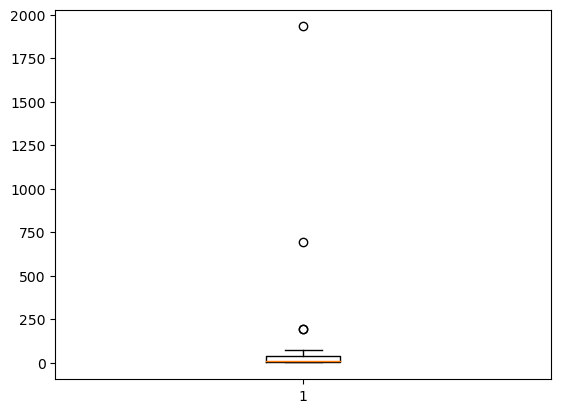

In [86]:
## Create a boxlot to identify outliers.

plt.boxplot(group_valuation['Valuation_num'])

### YOUR CODE HERE ###

plt.show()




In order to visualize the rest of the data properly, consider United States, China, India, and the United Kingdom outliers and remove them.

In [92]:
df_companies_sum_outliers_removed = group_valuation[~group_valuation['Country/Region'].isin(['China', 'United States','India','United Kingdom'])]

In [68]:
# Remove outlier countries.

df_no_outliers = group_valuation[4:]
df_no_outliers

,Country/Region,Valuation_num
17,Germany,72.0
38,Sweden,63.0
1,Australia,56.0
16,France,55.0
7,Canada,49.0
36,South Korea,41.0
22,Israel,39.0
6,Brazil,37.0
3,Bahamas,32.0
20,Indonesia,28.0


Now, the data is ready to reveal the top 20 countries with highest company valuations. A data visualization, `sns.barplot` can be used. Complete the code below to plot the data.

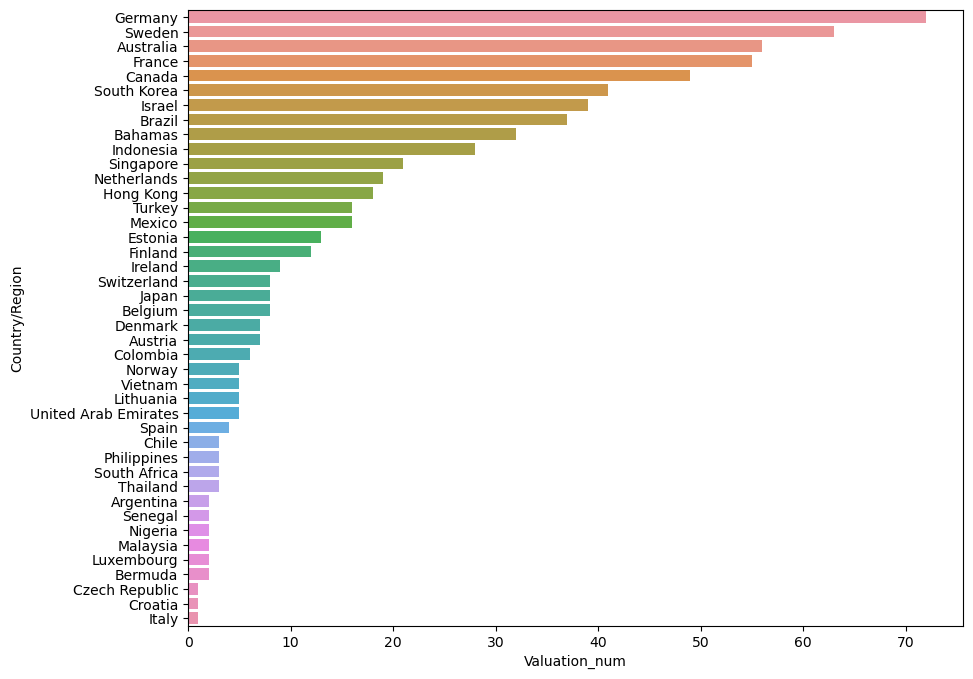

In [74]:
# Create a barplot to compare the top 20 countries with highest company valuations.
plt.figure(figsize=(10,8));
sns.barplot(data=df_no_outliers,
            y=df_no_outliers['Country/Region'],
            x=df_no_outliers['Valuation_num'])

# Show the plot.
plt.show()

### Plot maps

Your investor has also asked for: 
 - A global valuation map of all countries with companies that joined the list after 2020
 - A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` and a separate map for Europe 

To create these, plot the data onto maps. 

You have learned about using `scatter_geo()` from `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the countries with valuation of companies joined after 2020.

/tmp/ipykernel_8823/175242734.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



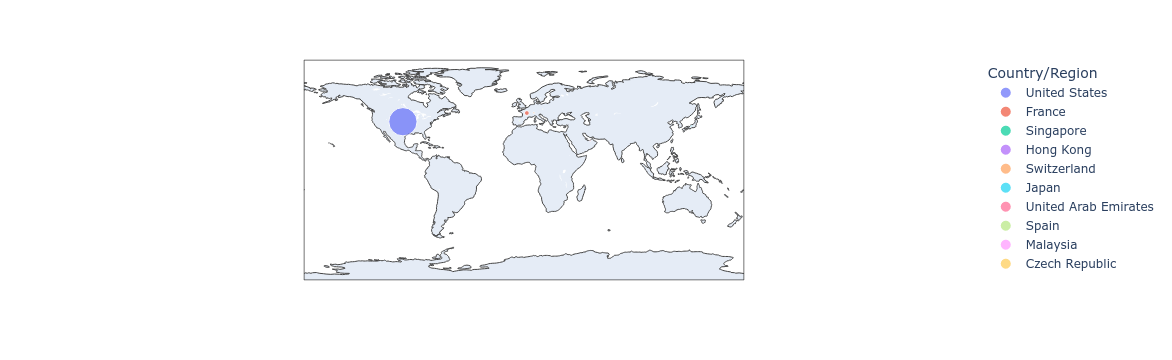

In [95]:
# Plot the sum of valuations per country.

px.scatter_geo(group_valuation[
    data["Date Year"] > 2020
    ], locations='Country/Region', size='Valuation_num', locationmode='country names', color='Country/Region')


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Filter the `df_companies` by 'Year_Joined'.

</details>

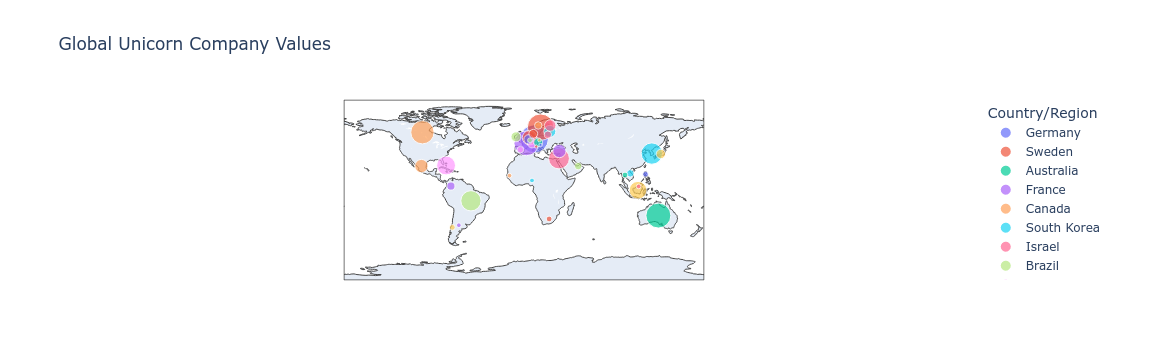

In [96]:
# Plot the sum of valuations per country.

fig = px.scatter_geo(df_no_outliers, 
                     locations='Country/Region', 
                     size='Valuation_num', 
                     locationmode='country names', 
                     color='Country/Region', 
                     title='Global Unicorn Company Values')

# Show the plot.
fig.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Use the code in the previous step to complete this section.

</details>

**Question: How is the valuation sum per country visualized in the plot?**

[Write your response here. Double-click (or enter) to edit.]

To create the same map for `europe` only, update the `fig` object to add a new title and also limit the scope of the map to `europe`.

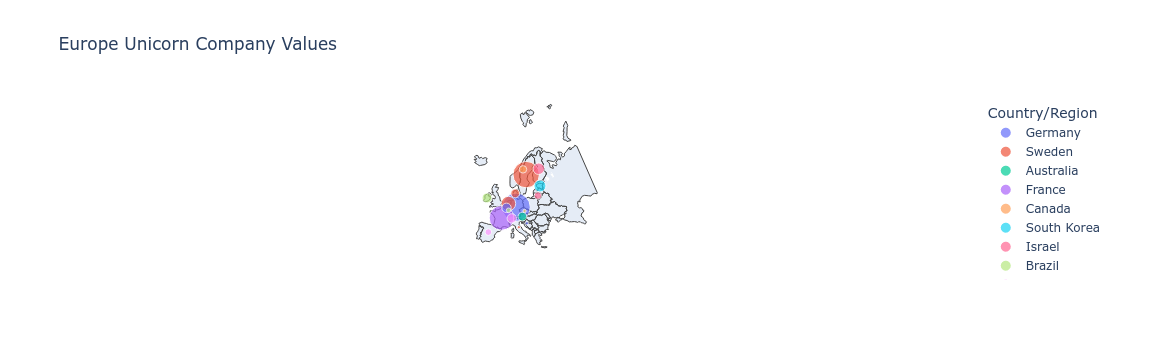

In [97]:
# Update the figure layout.

fig.update_layout(
    title_text = 'Europe Unicorn Company Values', # Create a Title
    geo_scope='europe',  # Plot only the Europe instead of globe
)

# Show the plot again.
fig.show()

**Question: What steps could you take to further analyze the data?**


merge more data, more visual, deeper statistics.

## Conclusion

**What are some key takeaways that you learned during this lab?**

Thanks a lot for the challange.

**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**

Visuals are very helpfull to understand a different point of view that can enlarge our general understanding of sertain subject.




**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

